Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read Data

In [2]:
file = pd.ExcelFile("../../../data/v7/Handballprojekt_2Liga_14.01.2023.xlsx")

file.sheet_names

df = file.parse('2. Liga')

# drop last col comments & favorite corner & empy rows at end
df = df.iloc[:, :-2]


Cleanup & Renaming

In [3]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
#df.dropna(inplace=True)
df.replace('-', np.nan,inplace=True)
df.columns = [ 'homeTeam','opponentTeam','day','name','playTime',
              'homeGoals','opponentGoals','throwSuccess','whistleThrowTime',
              'LRHandy','throwDirection','goalKeeperPosition',
              'goalKeeperName', 'goalKeeperHeightCM','shooterheightCM',
              'pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','playTime':'float16',
              'homeGoals':'float16','opponentGoals':'float16','whistleThrowTime':'float16','goalKeeperPosition':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16','goalKeeperName':'string', 'goalKeeperHeightCM':'float16','shooterheightCM':'float16' })
df.head()

,homeTeam,opponentTeam,day,name,playTime,homeGoals,opponentGoals,throwSuccess,whistleThrowTime,LRHandy,throwDirection,goalKeeperPosition,goalKeeperName,goalKeeperHeightCM,shooterheightCM,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,EHV Aue,TUSEM Essen,1.0,Noah Beyer,10.0,5.0,3.0,1.0,NaN,1.0,3.0,NaN,Bochmann,192.0,180.0,0.0,1.0,NaN,NaN
1,EHV Aue,TUSEM Essen,1.0,Noah Beyer,15.0,8.0,4.0,1.0,NaN,1.0,9.0,NaN,Bochmann,192.0,180.0,0.0,2.0,3.0,1.0
2,EHV Aue,TUSEM Essen,1.0,Noah Beyer,34.0,15.0,14.0,0.0,NaN,1.0,2.0,NaN,Petursson,185.0,180.0,0.0,3.0,9.0,1.0
3,EHV Aue,TUSEM Essen,1.0,Noah Beyer,39.0,18.0,17.0,1.0,NaN,1.0,8.0,NaN,Petursson,185.0,180.0,2.0,4.0,2.0,2.0
4,EHV Aue,TUSEM Essen,1.0,Noah Beyer,43.0,19.0,19.0,1.0,NaN,1.0,7.0,NaN,Petursson,185.0,180.0,0.0,5.0,8.0,1.0


97.0
['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-100', '100-105', '105-110', '110-115', '115-120', '120-125', '125-130', '130-135', '135-140', '140-145', '145-150', '150-155', '155-160', '160-165', '165-170', '170-175', '175-180']


throwSuccess,Fail,Success
whistleThrowTimeGroup,,
10-15,0.250000,0.750000
15-20,0.161290,0.838710
20-25,0.214286,0.785714
25-30,0.046512,0.953488
30-35,0.178571,0.821429
35-40,NaN,1.000000
40-45,0.125000,0.875000
45-50,NaN,1.000000
50-55,0.222222,0.777778


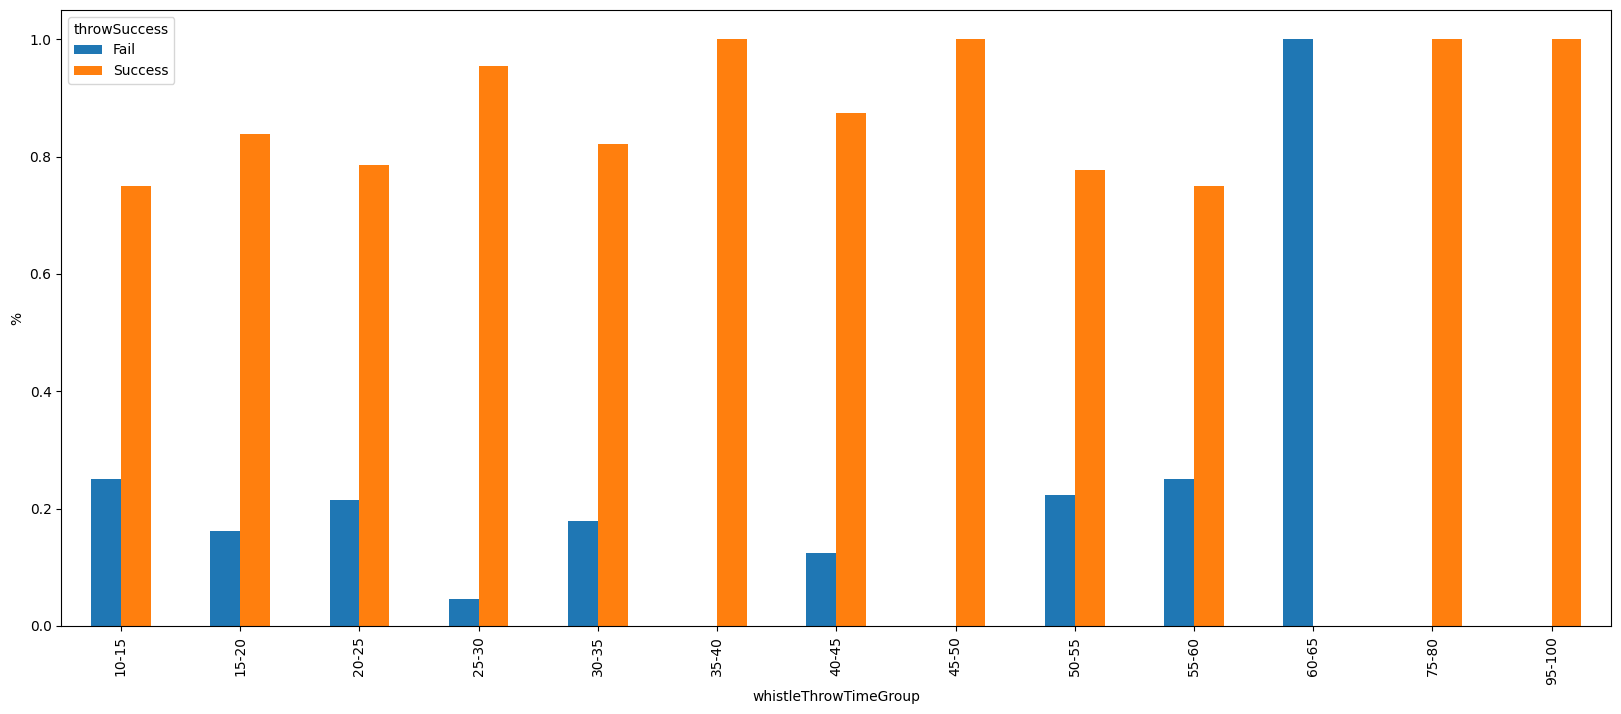

In [4]:
df1 = df.loc[:,('whistleThrowTime','throwSuccess')].copy()
df1.dropna(inplace=True)
df1['throwSuccess'].replace(2.0, 1.0,inplace=True)
df1['throwSuccess'].replace(1.0, 'Success',inplace=True)
df1['throwSuccess'].replace(0.0, 'Fail',inplace=True)

#Range 1-60
start = 0
print(df1['whistleThrowTime'].max())
stop = 180
step = 5
binLabels = [str(num) + '-' + str(num + step) for num in range(start, stop,step)]
print(binLabels)
df1['whistleThrowTimeGroup'] = pd.cut(df1.whistleThrowTime,[num for num in range(start, stop+1,step)], labels=binLabels)
df1.drop(columns=['whistleThrowTime'],inplace=True)
df2 = df1.groupby('whistleThrowTimeGroup',observed = True).throwSuccess.value_counts(normalize=True)
df2.unstack().plot.bar(ylabel='%',figsize=(20,8))
df2.unstack()

In [5]:
df3 = df1.groupby('whistleThrowTimeGroup',observed = True).throwSuccess.value_counts(normalize=False)
df3.unstack()

throwSuccess,Fail,Success
whistleThrowTimeGroup,,
10-15,1.0,3.0
15-20,5.0,26.0
20-25,6.0,22.0
25-30,2.0,41.0
30-35,5.0,23.0
35-40,NaN,15.0
40-45,1.0,7.0
45-50,NaN,6.0
50-55,2.0,7.0
